## 타이타닉 데이터셋 도전

- 승객의 나이, 성별, 승객 등급, 승선 위치 같은 속성을 기반으로 하여 승객의 생존 여부를 예측하는 것이 목표

- [캐글](https://www.kaggle.com)의 [타이타닉 챌린지](https://www.kaggle.com/c/titanic)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 datasets 디렉토리에 titanic_train.csv titanic_test.csv로 저장

## 1. 데이터 탐색

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 데이터 적재

In [88]:
train_data = pd.read_csv("datasets/titanic_train.csv")
test_data = pd.read_csv("datasets/titanic_test.csv")

#### 1.2 train_data 살펴보기

In [89]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Survived**: 타깃. 0은 생존하지 못한 것이고 1은 생존을 의미
* **Pclass**: 승객 등급. 1, 2, 3등석.
* **Name**, **Sex**, **Age**: 이름 그대로의 의미
* **SibSp**: 함께 탑승한 형제, 배우자의 수
* **Parch**: 함께 탑승한 자녀, 부모의 수
* **Ticket**: 티켓 아이디
* **Fare**: 티켓 요금 (파운드)
* **Cabin**: 객실 번호
* **Embarked**: 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)


#### 1.3 누락 데이터 살펴보기

In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- (Question) Null값이 포함된 특성은?
- **Age**, **Cabin**, **Embarked**
- (Question) 꽤 많은 값이 Null인 특성은? (대략 77%) 이 특성은 어떻게 할것인가?
- **Cabin**이 77%가 Null. 이 특성은 무시
- (Question ) 비교적 적은 수의 Null이 있는 특성은? (대략 19%) 이 특성은 어떻게 할 것인가?
- **Age**이 19% Null. 이 특성은 결측값에 대해 중간 나이로 대체
- (Question) 삭제할 특성이 있는가?
- **Name**, **Ticket** 특성은 지금은 무시

#### 1.4 통계치 살펴보기

In [91]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- (Queston) 생존자는 몇 % 인가?
* 38%
- (Question) **Fare**(요금)의 평균값은?
* 32.20 파운드
- (Question) **Age** 의  평균값은?
* 29세

#### 1.5 타깃(Survived)값의 빈도수 확인

In [92]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 1.6 범주형(카테고리) 특성들을 확인
- **Pclass**, **Sex**, **Embarked**
- **Embarked** 특성은 승객이 탑승한 곳 : C=Cherbourg, Q=Queenstown, S=Southampton.

In [93]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

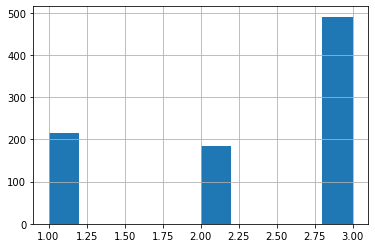

In [94]:
train_data["Pclass"].hist()

In [95]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [96]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

---

#### 1.7 Name과 Age 열 을 Age 순으로 정렬해서 보기

In [97]:
train_data[["Name", "Age"]].sort_values(by="Age")

,Name,Age
803,"Thomas, Master. Assad Alexander",0.42
755,"Hamalainen, Master. Viljo",0.67
644,"Baclini, Miss. Eugenie",0.75
469,"Baclini, Miss. Helene Barbara",0.75
78,"Caldwell, Master. Alden Gates",0.83
...,...,...
859,"Razi, Mr. Raihed",NaN
863,"Sage, Miss. Dorothy Edith ""Dolly""",NaN
868,"van Melkebeke, Mr. Philemon",NaN
878,"Laleff, Mr. Kristo",NaN


#### 1.8 나이(Age)가 60 이상인 사람들의 Name과 Age 확인해 보기

In [98]:
train_data[train_data["Age"] >= 60][["Name", "Age"]]

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0
252,"Stead, Mr. William Thomas",62.0
275,"Andrews, Miss. Kornelia Theodosia",63.0
280,"Duane, Mr. Frank",65.0
326,"Nysveen, Mr. Johan Hansen",61.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0


#### 1.9 나이가(Age)가 60 이상이고 1등석에 탔으며 여성인 탑승자 확인해 보기

In [99]:
train_data[(train_data["Age"] >= 60 ) & (train_data["Pclass"] == 1) & (train_data["Sex"] == "female")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


#### 1.10 요금(Fare)의 최대값 최소값 확인해 보기

In [100]:
train_data["Fare"].max()

512.3292

In [101]:
train_data["Fare"].min()

0.0

#### 1.11 등급(Pcalss) 그룹별 생존률 확인해보기

In [102]:
train_data.groupby(by="Pclass").size()

Pclass
1    216
2    184
3    491
dtype: int64

In [103]:
train_data.groupby(by="Pclass").sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [104]:
train_data.groupby(by="Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [105]:
136/(80+136)

0.6296296296296297

In [106]:
train_data.groupby(["Pclass", "Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [107]:
train_data.groupby(by="Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

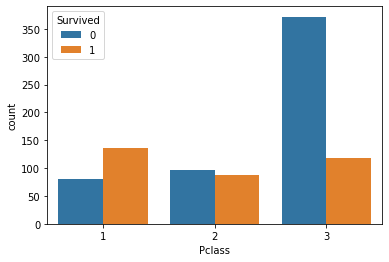

In [156]:
sns.countplot(data=train_data, x="Pclass", hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

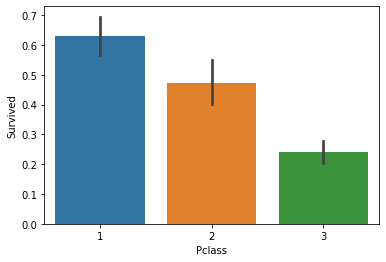

In [108]:
sns.barplot(data=train_data, x="Pclass", y="Survived") # category 특성의 경우, 타깃값에 어떤 영향이 있는지 확인

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

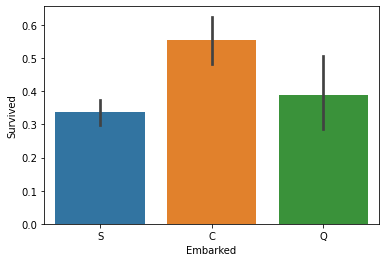

In [109]:
sns.barplot(data=train_data, x="Embarked", y="Survived") # category 특성 - Embarked, Sex, Pclass

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

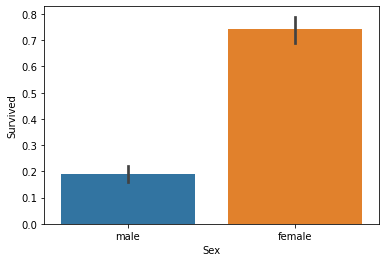

In [110]:
sns.barplot(data=train_data, x="Sex", y="Survived")

#### 1.12 특성을 조합해 또다른 특성(RelativesOnboard)을 만들기(가족과 탑승한 사람과 혼자 탑승한 사람)

In [111]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"] + 1

In [112]:
train_data["RelativesOnboard"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: RelativesOnboard, dtype: int64

#### 1.13 RelativesOnboard 그룹의 생존률 평군 알아보기

In [113]:
train_data.groupby(by="RelativesOnboard")["Survived"].mean()

RelativesOnboard
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

## 2. 데이터 전처리 (누락 데이터 처리, 범주화 등)

#### 2.1 Cabin 열 : 전체 삭제하기

In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  RelativesOnboard  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [115]:
train_data.dropna(thresh=500, axis=1, inplace=True)

In [116]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'RelativesOnboard'],
      dtype='object')

#### 2.2  Embarked 열 : 누락데이터를 승선도시 최고 빈도수 값으로 대체하기

In [117]:
train_data["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [118]:
tmp = train_data["Embarked"].value_counts(dropna=False)
most_freq = tmp.idxmax() # idxmax() 주어진 시리즈에서 값이 가장 큰 데이터의 "인덱스"를 반환
most_freq

'S'

In [119]:
train_data["Embarked"].fillna(most_freq, inplace=True)# dropna, fillna, isna(isnull)

In [120]:
train_data["Embarked"].value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### 2.3  Age 열 : 중간값으로 대체하기

In [121]:
train_data["Age"].isnull().sum()

177

In [122]:
median_age = train_data["Age"].median()
median_age

28.0

In [123]:
train_data["Age"].fillna(median_age, inplace = True)

In [124]:
train_data["Age"].isnull().sum()

0

#### 2.4  Age 열: 범주로 나눠보기

* 0~18세
* 18~25세
* 25~35세
* 35~60세
* 60~80세

In [125]:
bins = [0, 18, 25, 35, 60, 80]
group_names = ["Children", "Youth", "YoungAdult", "MiddleAged", "Senior"]
age_cats = pd.cut(train_data["Age"], bins, labels = group_names) 
age_cats

0           Youth
1      MiddleAged
2      YoungAdult
3      YoungAdult
4      YoungAdult
          ...    
886    YoungAdult
887         Youth
888    YoungAdult
889    YoungAdult
890    YoungAdult
Name: Age, Length: 891, dtype: category
Categories (5, object): ['Children' < 'Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [126]:
train_data["AgeCat"] = age_cats # Categroies 데이터를 train_data의 한 컬럼으로 치환할 수 도 있음

In [127]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,RelativesOnboard,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,MiddleAged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,YoungAdult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,YoungAdult


In [128]:
age_cats.value_counts() # Categories 타입에 대해서도 value_counts()를 구할 수 있음

YoungAdult    373
MiddleAged    195
Youth         162
Children      139
Senior         22
Name: Age, dtype: int64

In [129]:
train_data["AgeCat"].value_counts() # 특성으로 색인한 시리즈 데이터에 대해서도 value_counts()를 구할 수 있음

YoungAdult    373
MiddleAged    195
Youth         162
Children      139
Senior         22
Name: AgeCat, dtype: int64

<AxesSubplot:xlabel='AgeCat', ylabel='Survived'>

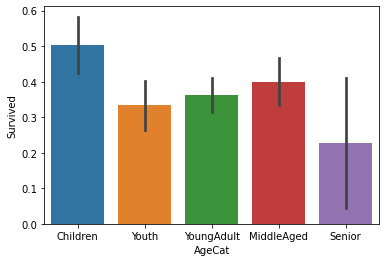

In [130]:
sns.barplot(data=train_data, x="AgeCat", y="Survived") # AgeCat 특성이 Survived(Target)에 미치는 영향

* 범주 데이터를 dummy 변수로 바꿔보기 (One-Hot Encoding)

In [131]:
Age_dummies = pd.get_dummies(age_cats) # (==)  pd.get_dummies(train_data["AgeCat"])
Age_dummies = Age_dummies.add_prefix("Age_")
Age_dummies

,Age_Children,Age_Youth,Age_YoungAdult,Age_MiddleAged,Age_Senior
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,1,0,0
887,0,1,0,0,0
888,0,0,1,0,0
889,0,0,1,0,0


#### 2.5 중복 데이터 확인

In [132]:
train_data.duplicated().sum()

0

#### 2.6 범주형 데이터에 대해 더미변수화 하기(One-hot Encoding)
- **Pclass**, **Sex**, **Embarked** 에 대해 각각 

In [133]:
Pclass_dummies = pd.get_dummies(train_data["Pclass"]) 
Pclass_dummies = Pclass_dummies.add_prefix("Pclass_")
Pclass_dummies

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [134]:
Sex_dummies = pd.get_dummies(train_data["Sex"]) 
Sex_dummies = Sex_dummies.add_prefix("Sex_")
Sex_dummies

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [135]:
Embarked_dummies = pd.get_dummies(train_data["Embarked"]) 
Embarked_dummies = Embarked_dummies.add_prefix("Embarked_")
Embarked_dummies

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


#### 2.7 필요없는 특성 삭제, 새로 생성된 특성 추가하기

#### 2.8 특성과 레이블 분리하기

In [136]:
y_train = train_data["Survived"].copy()

In [137]:
X_train = train_data.drop(["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "Ticket", "Embarked", "AgeCat"], axis=1) # 1번축(열)을~ drop

In [138]:
X_train = pd.concat([X_train, Age_dummies, Pclass_dummies, Sex_dummies, Embarked_dummies], axis=1) # 1번축(열)을 따라서~ concat
X_train.shape

(891, 17)

In [139]:
X_train.head()

,SibSp,Parch,Fare,RelativesOnboard,Age_Children,Age_Youth,Age_YoungAdult,Age_MiddleAged,Age_Senior,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,7.2500,2,0,1,0,0,0,0,0,1,0,1,0,0,1
1,1,0,71.2833,2,0,0,0,1,0,1,0,0,1,0,1,0,0
2,0,0,7.9250,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,53.1000,2,0,0,1,0,0,1,0,0,1,0,0,0,1
4,0,0,8.0500,1,0,0,1,0,0,0,0,1,0,1,0,0,1


#### 2.9 다양한 특성 조합 시도, 특성 스케일링

## 3. 모델 선택과 훈련

#### 분류기 훈련
* 예) LogisticRegression 등 배운 모델들 활용

In [148]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=1000, random_state=42)
#log_clf.fit(X_train, y_train)

#### 교차검증으로 평가 
- 모델의 성능을 평가할 때 사용

In [147]:
from sklearn.model_selection import cross_val_score

In [149]:
log_clf_scores = cross_val_score(log_clf, X_train, y_train, cv=3) # 교차 검증을 한 뒤, 검증 횟수(cv=3)만큼의 검증 점수를 반환

In [150]:
log_clf_scores

array([0.78451178, 0.78451178, 0.7979798 ])

In [151]:
log_clf_scores.mean() # 교차 검증 결과들(현재 3개)을 평균한 값

0.7890011223344556

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
knn_clf = KNeighborsClassifier()
knn_clf_scores = cross_val_score(knn_clf, X_train, y_train, cv=3) 
knn_clf_scores

array([0.70707071, 0.76430976, 0.73737374])